<h2>Сибгатуллин Артур. 310 группа. ДЗ-1</h2> <br>
Нормальное распределение (или распределение Гаусса) - $N(\mu,\sigma^2)$, где параметр $\mu$ это математическое ожидание распределения, а $\sigma > 0$ среднеквадратичное отклонение. Задается функцией плотности $p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} , 
x \in \mathbb{R}$ <br>
Математическое ожидание: $\mu$ <br>
Дисперсия: $\sigma^2$ <br>

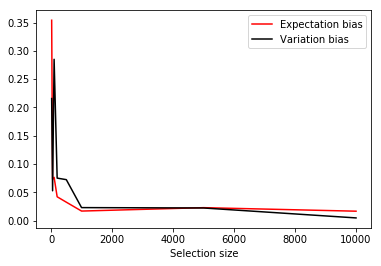

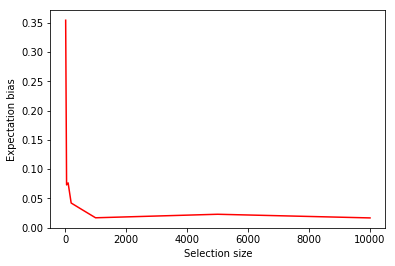

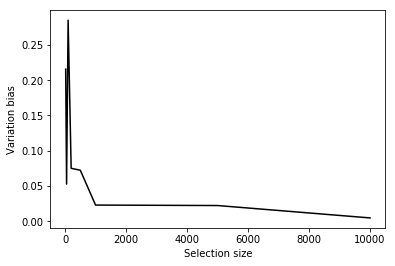

Maximum of expectation bias:  0.3540998653720435
Maximum of variation bias:  0.2850863312200753


In [29]:
from math import *
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

alpha = 0 
sigma_2 = 1
continious_size = 10000000
selection = norm.rvs(alpha, sigma_2, size = 10000)
expectation, variation = norm.stats (alpha, sigma_2, moments = 'mv')

selection_size = [20, 50, 100, 200, 500, 1000, 5000, 10000]
expectation_bias = []
variance_bias = []
for i in selection_size:
    expectation_bias.append (fabs (np.mean (selection[:i]) - expectation))
    variance_bias.append (fabs (np.var(selection[:i], ddof = 1) - variation))

plt.plot(selection_size, expectation_bias, label = 'Expectation bias', color = 'red')
plt.plot(selection_size, variance_bias, label = 'Variation bias', color = 'black')
plt.xlabel('Selection size')
plt.legend(loc = 0)
plt.show()

plt.plot(selection_size, expectation_bias, color = 'red')
plt.ylabel('Expectation bias')
plt.xlabel('Selection size')
plt.show()


plt.plot(selection_size, variance_bias, color = 'black')
plt.ylabel('Variation bias')
plt.xlabel('Selection size')
plt.show()
    
print('Maximum of expectation bias: ', max(expectation_bias))
print('Maximum of variation bias: ', max(variance_bias))

Как можно заметить оценка для дисперсии сходится быстрее (на самом деле при увеличении числа выборки и при построении графика не только для наших размеров выборок, но и для для всех промежуточных это проверить легче, но компьютер не справляется. Проверял на $10^8$ с помощью colab.research.google.com)<br>

Пусть задана случайная величина $X$, такая что $\mathbb E|X|^3 < \infty$. Пусть $\mu_3$ обозначает третий центральный момент: $\mu_3 = \mathbb E[(X - \mathbb E X)^3]$, а $\sigma = \sqrt{D[X]}$ — стандартное отклонение 
X. Тогда коэффициент асимметрии задаётся формулой: $\gamma_1 = \frac{\mu_3}{\sigma^3}$

Построим оценку: $$\displaystyle\hat\gamma_1 =  
\frac {\overline{X^3} - 3\overline{X^2}\overline{X} + 2\overline{X}^3}
        {\left(\frac1{n}\sum\limits_{i=1}^{n}(X_i-\overline X)^2\right)^{3/2}} = 
        \frac{\frac{\sum\limits_{i=1}^{n}X_i^3}{n} - 3\frac{\sum\limits_{i=1}^{n}X_i^2\sum\limits_{i=1}^{n}X_i}{n^2}+2\Big(\frac{\sum\limits_{i=1}^{n}X_i}{n}\Big)^3}{\Bigg(\frac{\sum\limits_{i=1}^{n}X_i^2}{n}-\Big(\frac{\sum\limits_{i=1}^{n}X_i}{n}\Big)^2\Bigg)^{3/2}}$$

Известно, что:<br>
 	$$
 	\begin{equation}
 		\begin{cases}
 			\overline{X} = \frac{1}{n}\sum\limits_{i=1}^{n}X_i \xrightarrow{\mathbb{P}} \mathbb{E}X_i,
 			\\
 			\overline{X^2} = \frac{1}{n}\sum\limits_{i=1}^{n}X_i^2 \xrightarrow{\mathbb{P}} \mathbb{E}X_i^2,
 			\\
 			\overline{X^3} =\frac{1}{n}\sum\limits_{i=1}^{n}X_i^3 \xrightarrow{\mathbb{P}} \mathbb{E}X_i^3,
 			\\
 			h(v_1, v_2, v_3) = \frac{v_3 - 3v_1v_2+2v_1^3}{(v_2-v_1^2)^{3/2}}-\text{непрерывная функция}
		\end{cases}
	\end{equation}
	$$

$\Rightarrow$ по теореме о наследовании сходимости $$h\Bigg(\frac{1}{n}\sum\limits_{i=1}^{n}X_i, \frac{1}{n}\sum\limits_{i=1}^{n}X_i^2, \frac{1}{n}\sum\limits_{i=1}^{n}X_i^3\Bigg) \xrightarrow{\mathbb{P}} \gamma_1$$

К сожалению не смог показать при каких $x$, можно построить оценку для
$F(x)$

Нет, сходимость по вероятности не будет равномерной по $x$ т.к по определению сходимости по вероятности, у нас может быть множество меры нуль, на котором сходимости нет, но по определению равномерной сходимости: 
$
\displaystyle \forall\varepsilon > 0 \;
\exists\delta > 0, \;
\exists n_0 = n_0(\varepsilon): \;
\forall n > n_0\,\forall\omega \in \Omega \;
|X_n(\omega)-X(\omega)| < \delta 
\Rightarrow$ <br>
$\Rightarrow$ из сходимости по вероятности не следует равномерная сходимость